# Create subplots

There are two different ways to create subplots in `PolarToolkit`, which we demonstrate here.

Import the modules

In [1]:
import os

import polartoolkit as ptk

In [2]:
# set default to southern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

Define the region of interest and fetch the datasets

In [3]:
# choose a geographic region to extract data for
region = ptk.regions.getz_ice_shelf

grid1 = ptk.fetch.bedmap2(
    layer="bed",
    region=region,
)

grid2 = ptk.fetch.gravity(
    version="antgg-2021",
    anomaly_type="FA",
    region=region,
).free_air_anomaly

grid3 = ptk.fetch.magnetics(
    version="admap2",
    region=region,
)

grid4 = ptk.fetch.ice_vel(
    region=region,
)

## Method 1: `subplots()`

This functions takes a list of grids and plots each of them. You can customize the number of rows and columns by passing a tuple of (number rows, number columns) to `dims`. All the arguments are passed to `plot_grid()` to enable customing each plot. You can also customize each plot individually by passing lists of parameter values (1 for each subplot) to the following arguments: `titles`, `cmaps`, `cbar_labels`, and `cbar_units`.  

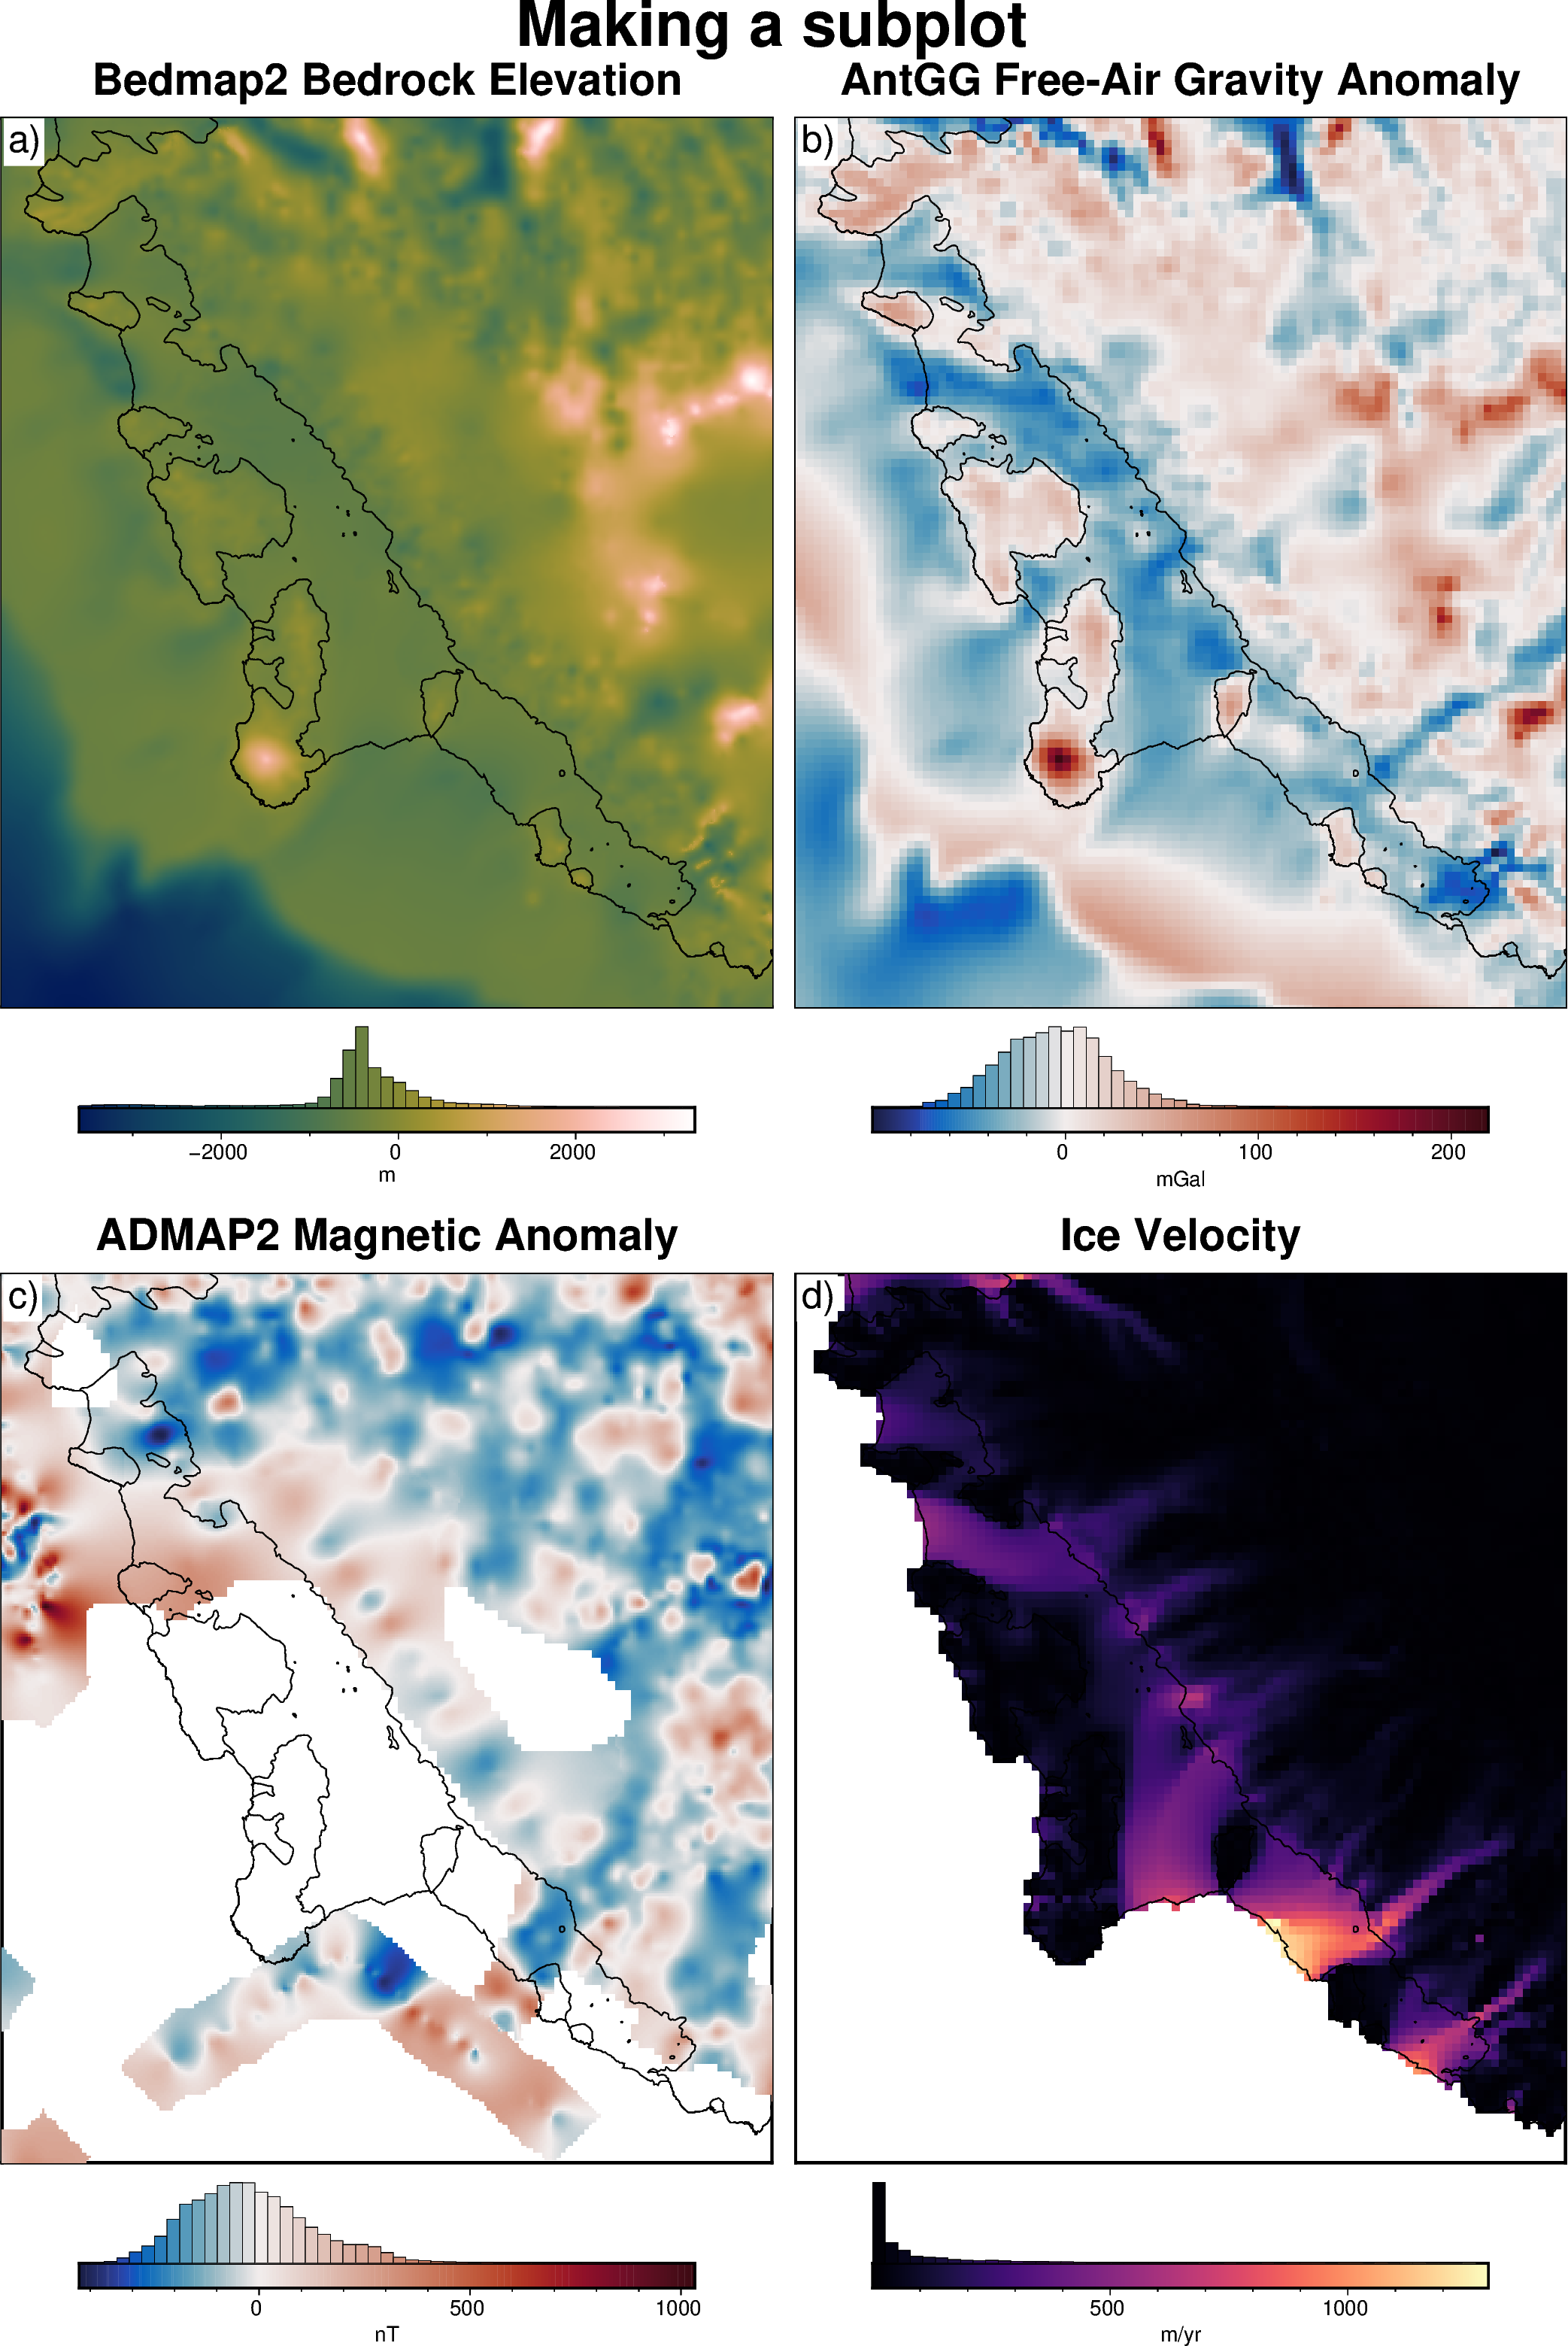

In [4]:
fig = ptk.subplots(
    [grid1, grid2, grid3, grid4],
    # dims=(2,1), # 1 row, 2 columns, if you want to change from the default
    fig_title="Making a subplot",
    titles=[
        "Bedmap2 Bedrock Elevation",
        "AntGG Free-Air Gravity Anomaly",
        "ADMAP2 Magnetic Anomaly",
        "Ice Velocity",
    ],
    cbar_labels=["m", "mGal", "nT", "m/yr"],
    coast=True,
    cmaps=["batlowW", "balance+h0", "balance+h0", "magma"],
    hist=True,
    colorbar=True,
)

fig.show(dpi=200)

## Method 2: `origin_shift`
For more control over customizing each subplot, or changing the layout of the subplots, you can use the argument `origin_shift` to setup your subplots. 

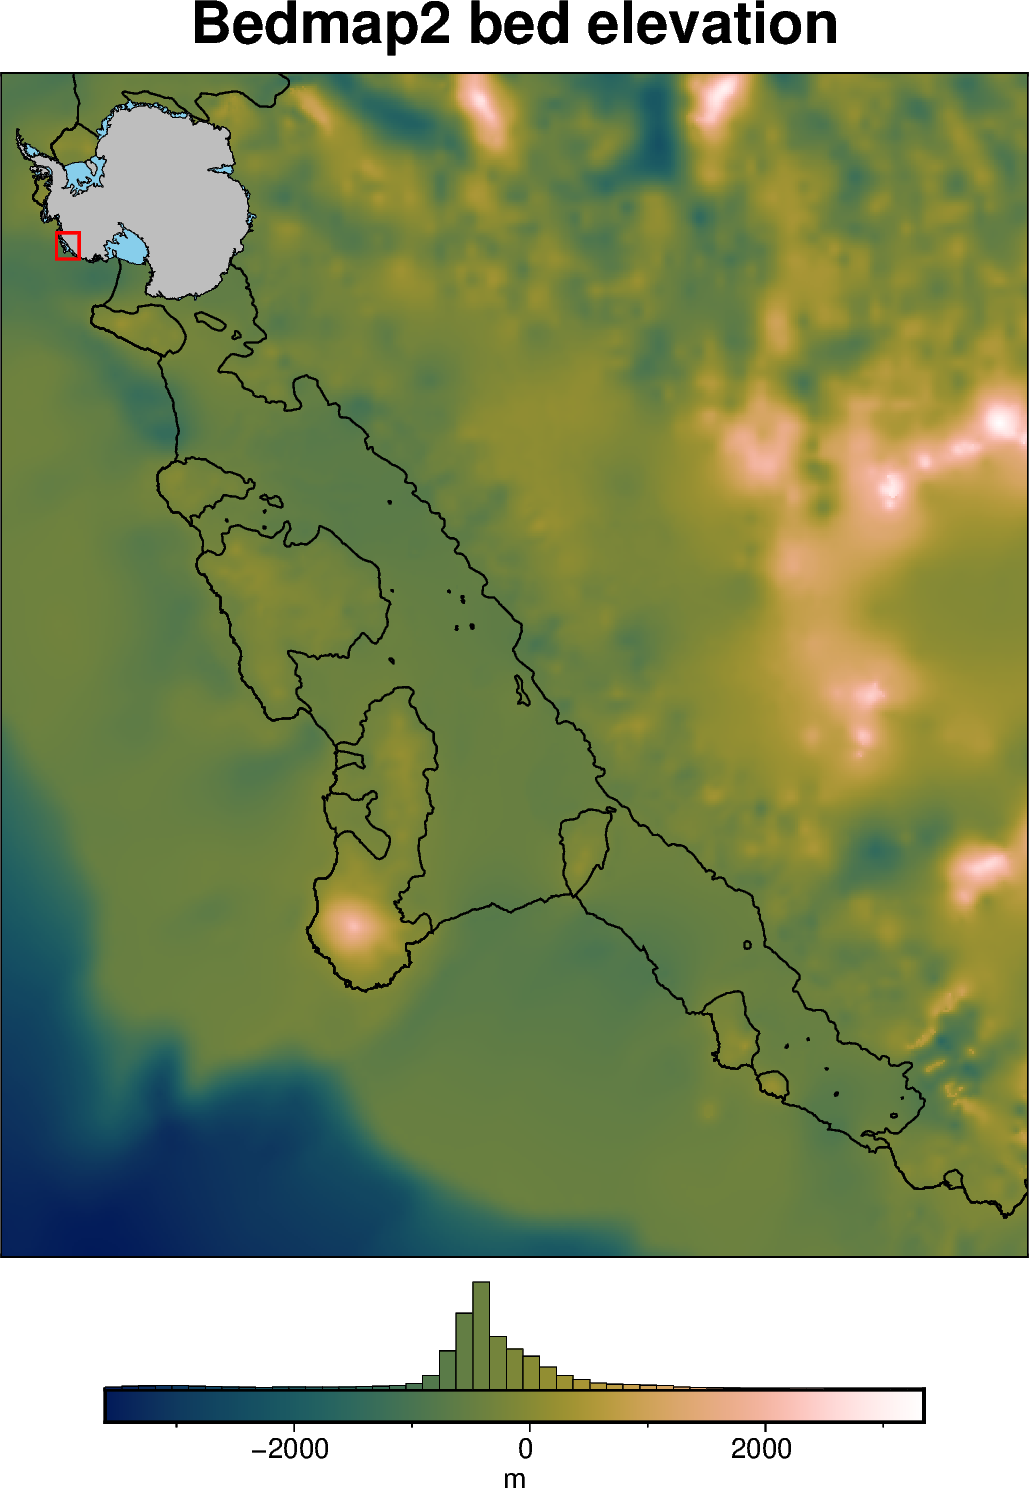

In [5]:
# create the first figure
fig = ptk.plot_grid(
    grid1,
    cmap="batlowW",
    coast=True,
    title="Bedmap2 bed elevation",
    cbar_label="m",
    hist=True,
    inset=True,
)

# display the figure
fig.show(dpi=200)

Add the second figure by passing the `fig` variable to `plot_grid`, and specifying `origin_shift`.

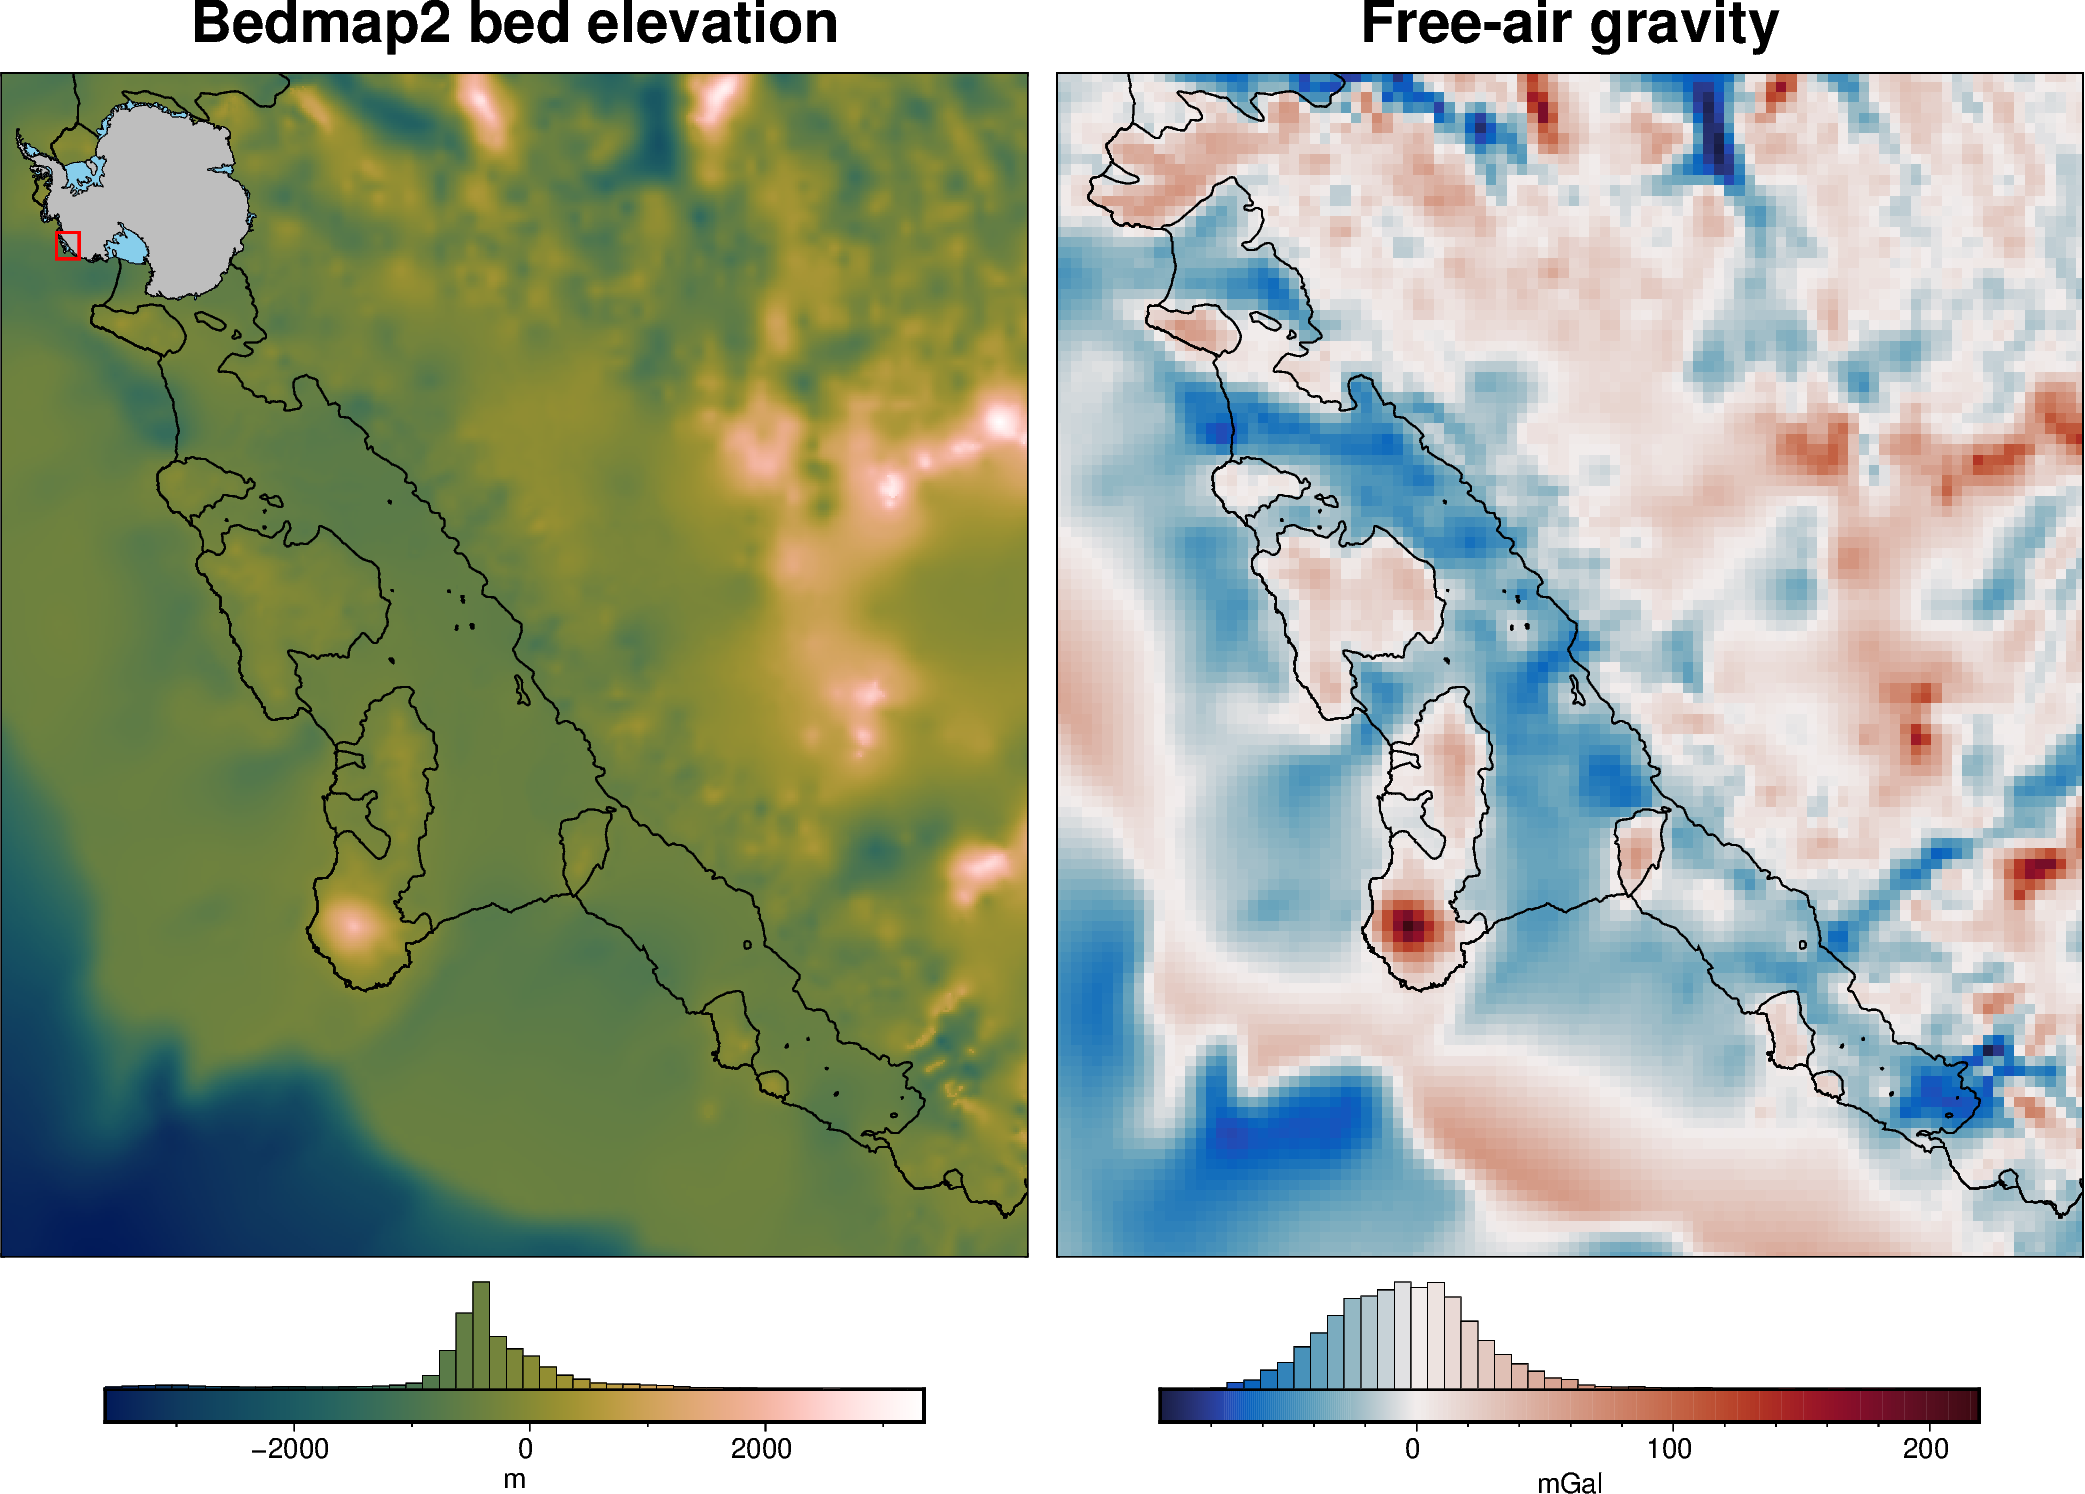

In [6]:
fig = ptk.plot_grid(
    grid2,
    fig=fig,
    origin_shift="x",  # shift subplot in horizontal direction
    # yshift_amount=1,  # default is 1, (1 figure width right)
    cmap="balance+h0",
    coast=True,
    title="Free-air gravity",
    cbar_label="mGal",
    hist=True,
)

# display the figure
fig.show(dpi=200)

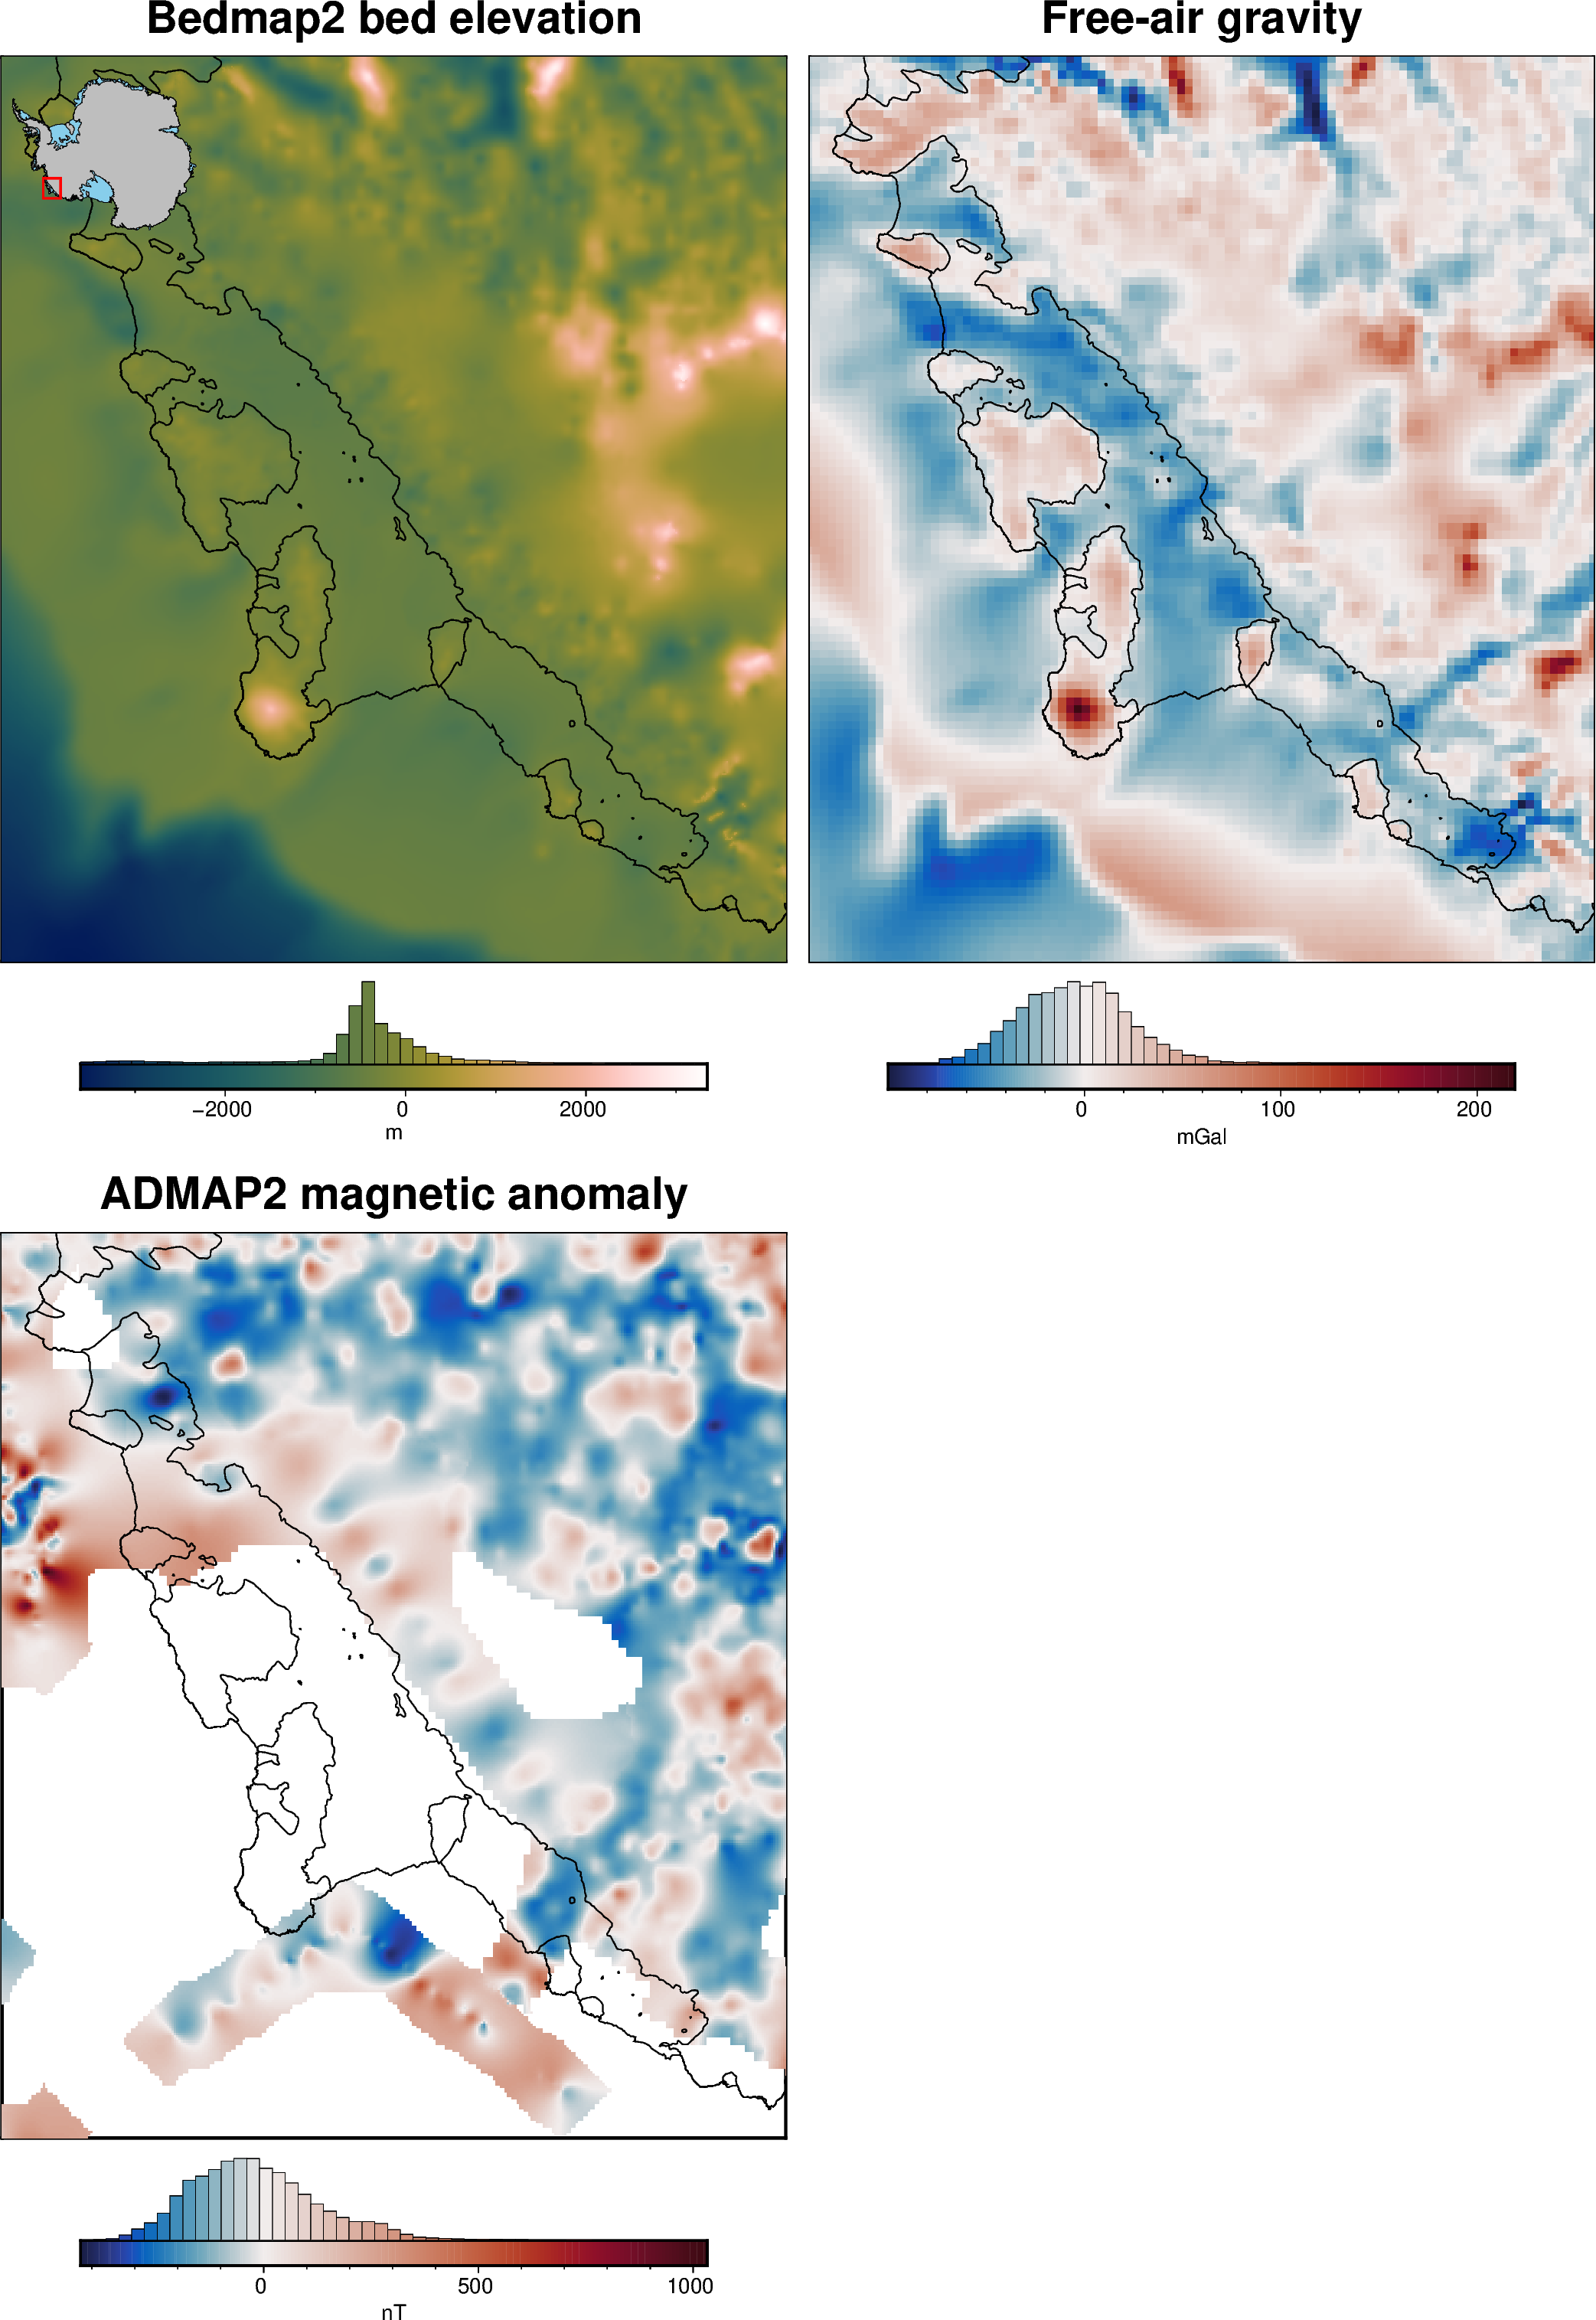

In [7]:
fig = ptk.plot_grid(
    grid3,
    fig=fig,
    origin_shift="both",  # shift subplot both down and to the left
    yshift_amount=-1,  # default is -1, (1 figure height down)
    xshift_amount=-1,
    cmap="balance+h0",
    coast=True,
    title="ADMAP2 magnetic anomaly",
    cbar_label="nT",
    hist=True,
)

# display the figure
fig.show(dpi=200)

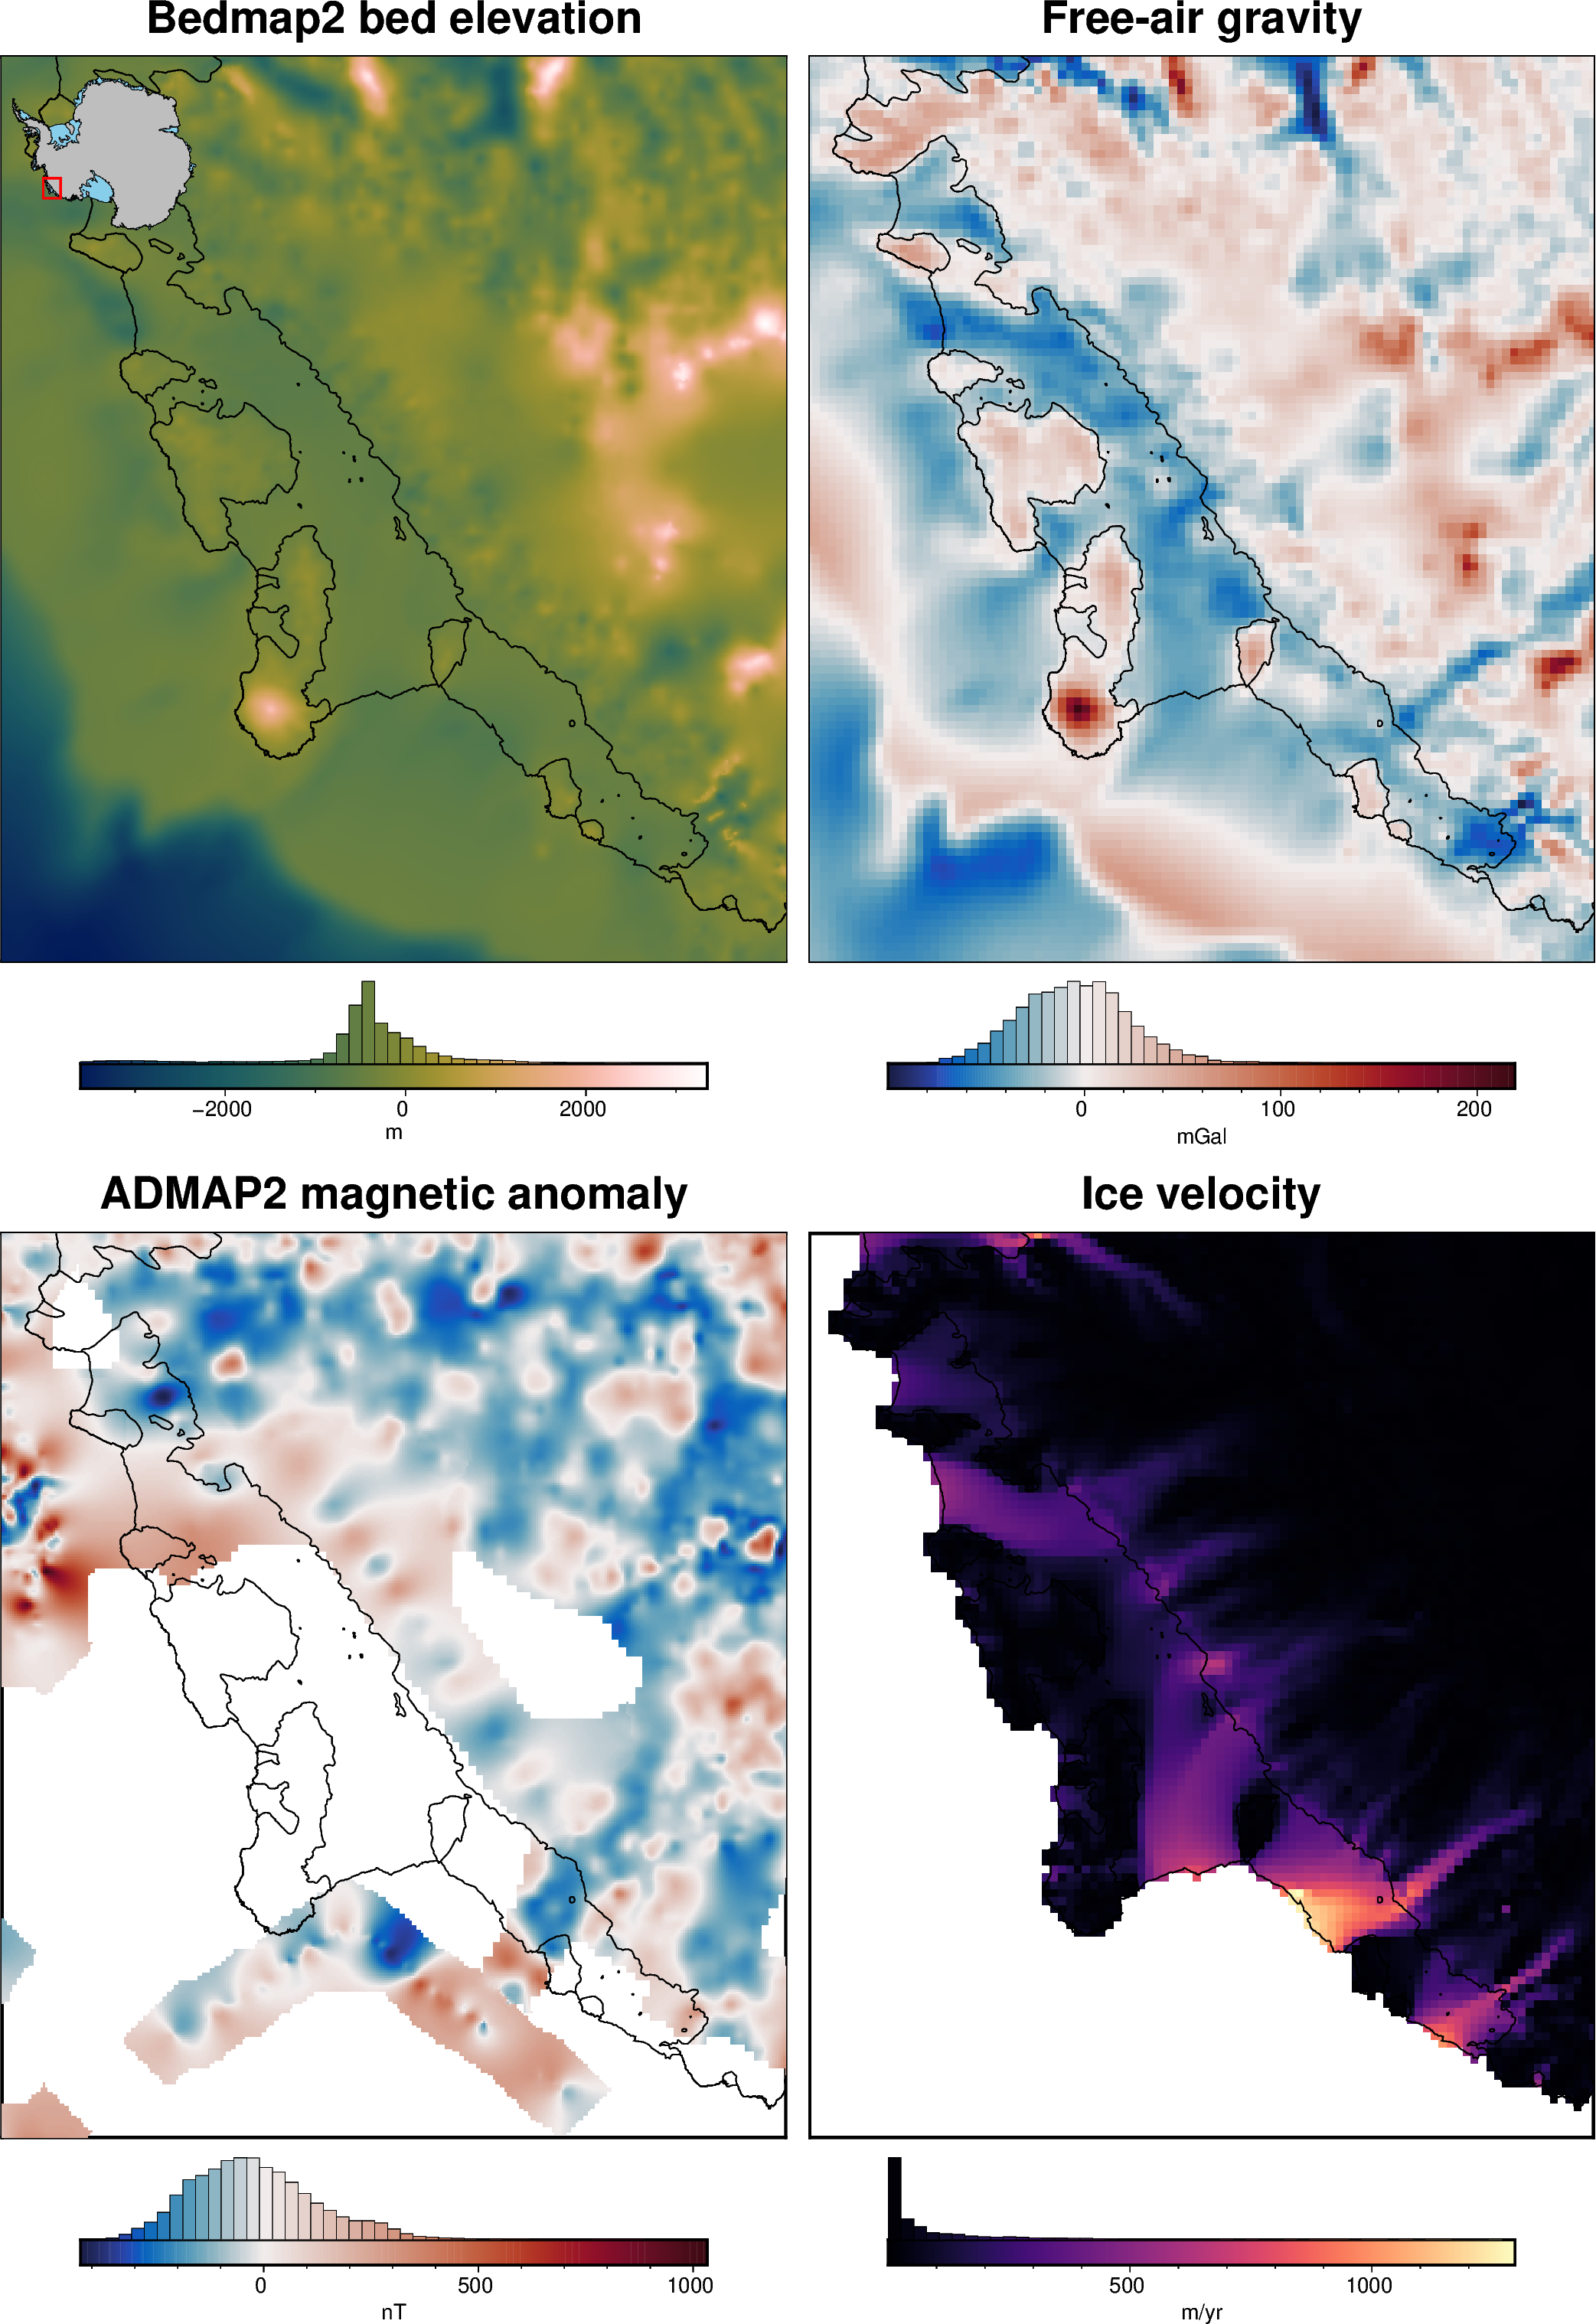

In [8]:
fig = ptk.plot_grid(
    grid4,
    fig=fig,
    origin_shift="x",  # shift subplot left
    cmap="magma",
    coast=True,
    title="Ice velocity",
    cbar_label="m/yr",
    hist=True,
)

# display the figure
fig.show(dpi=200)

This also works with `basemap()` to create a subplot without a grid file. Additionally, we can change the size of each subplot.

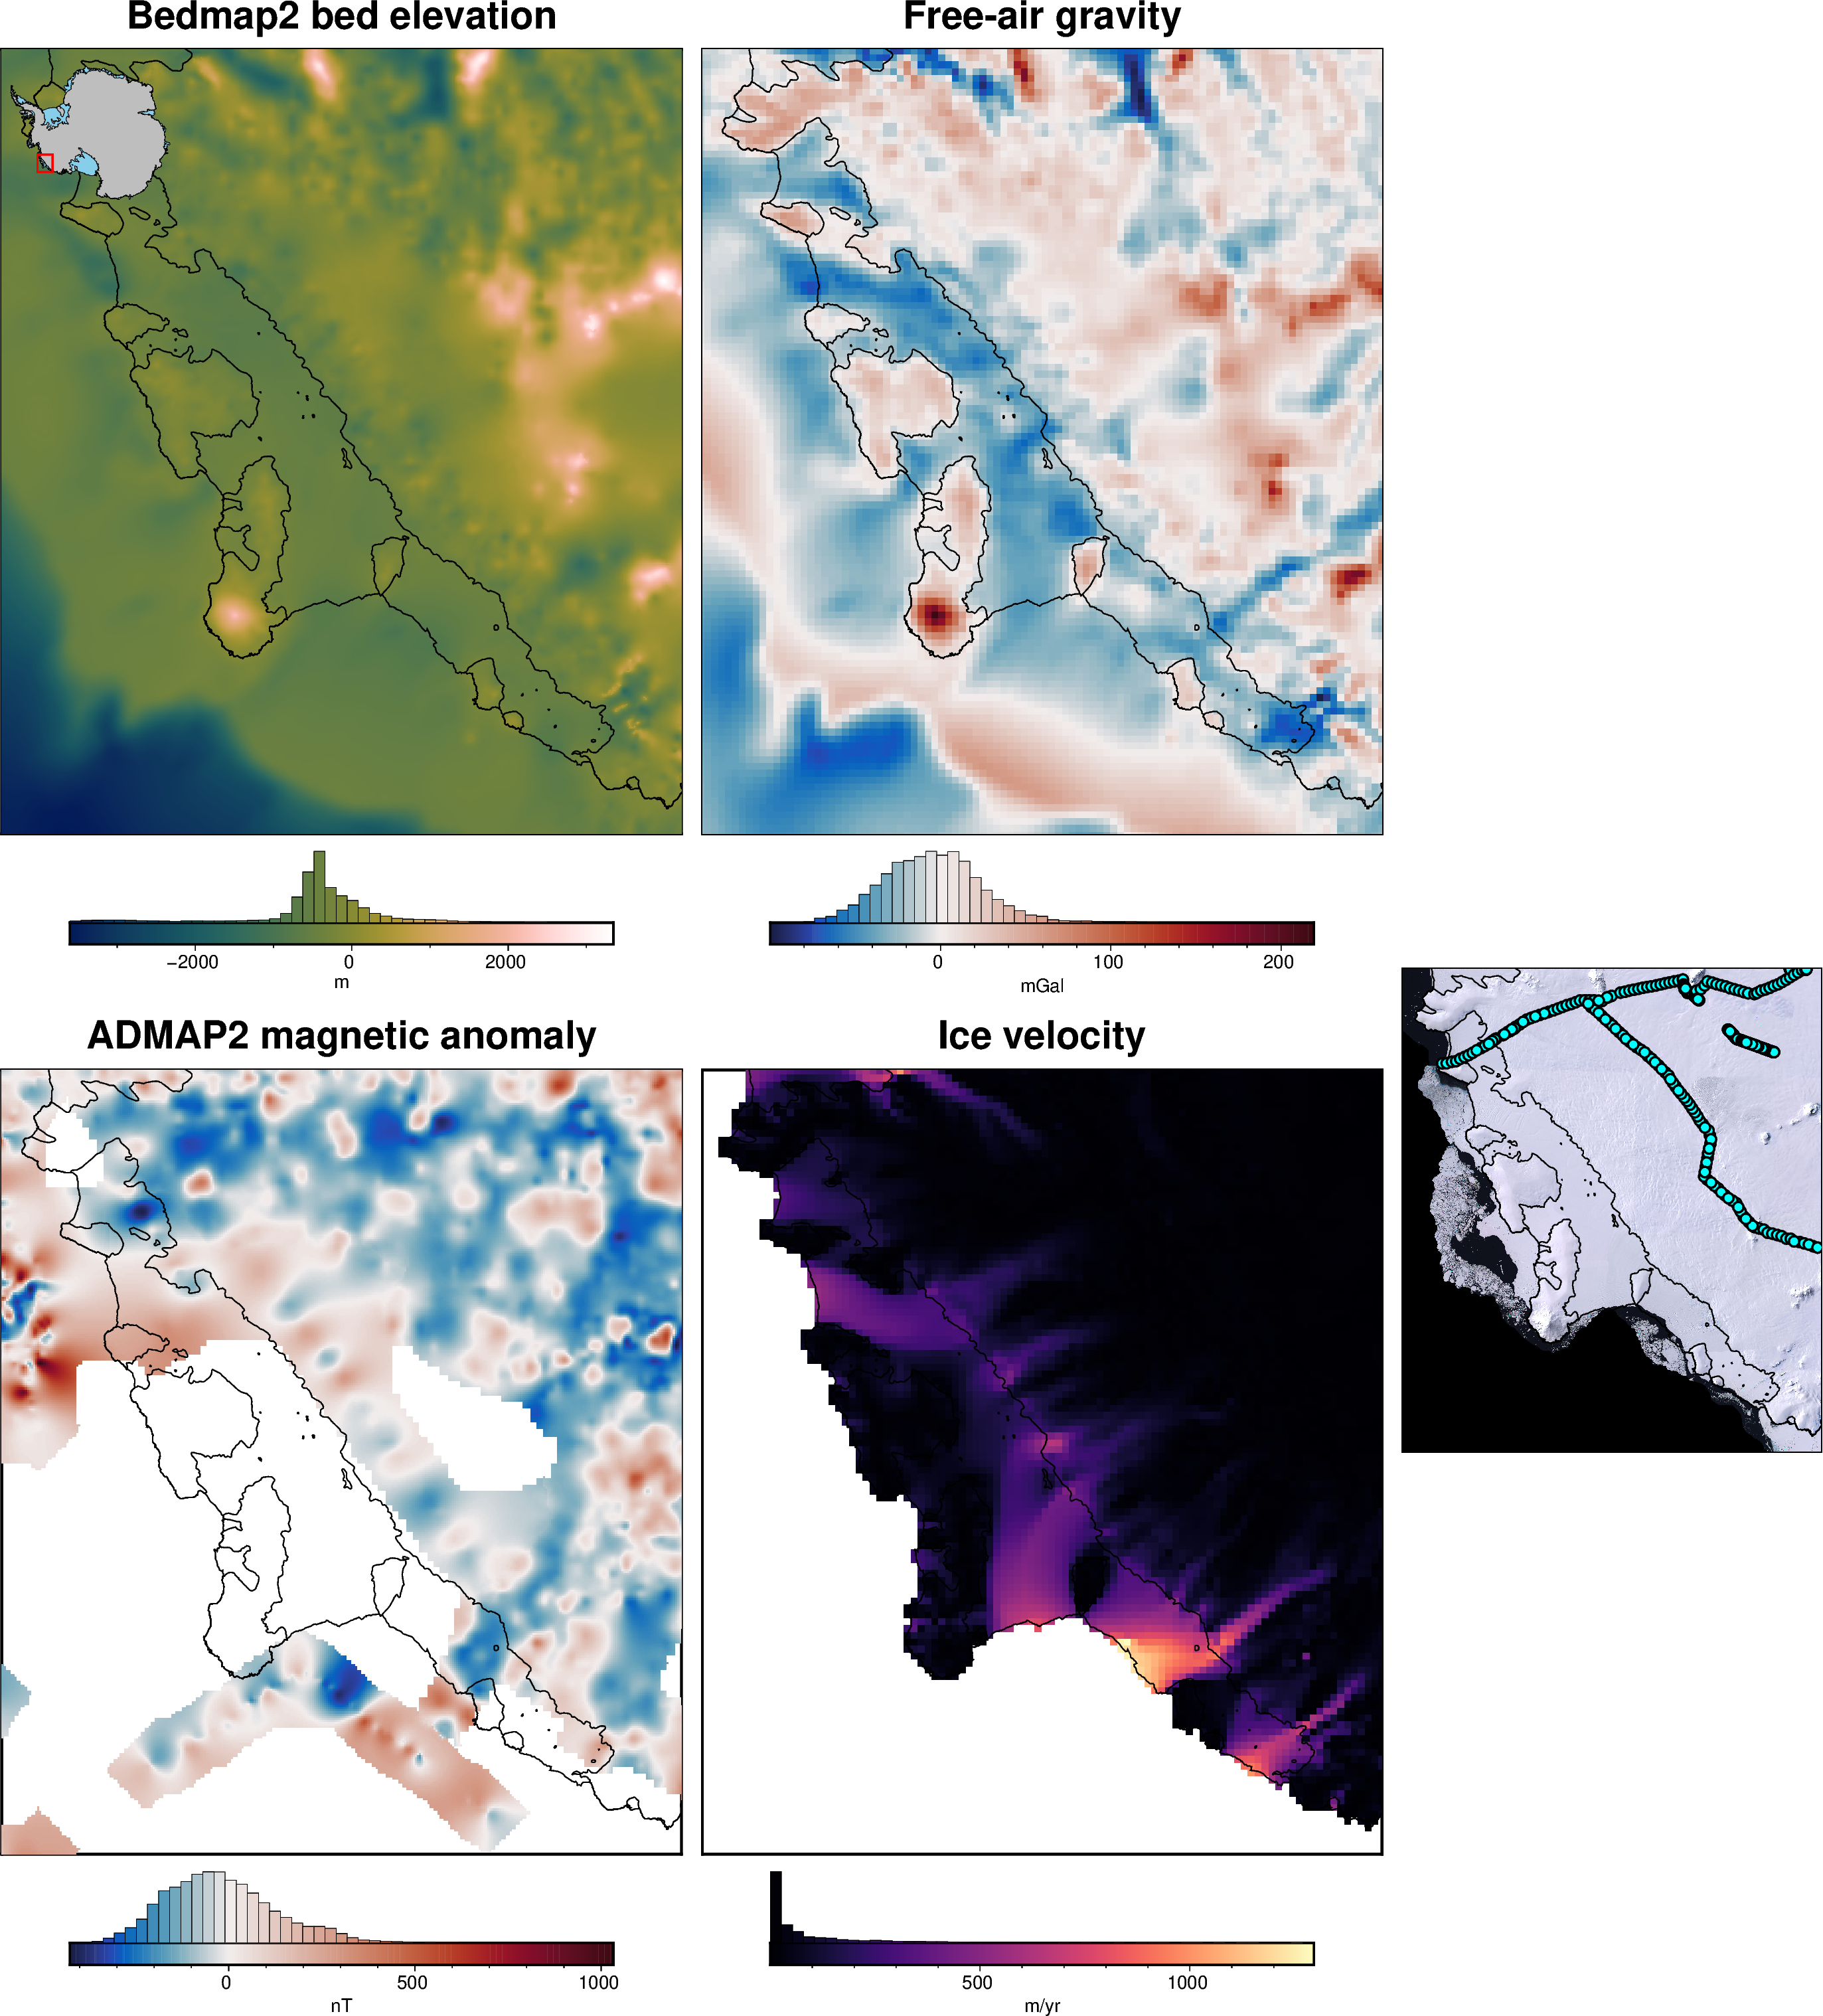

In [9]:
fig = ptk.basemap(
    fig=fig,
    region=region,
    imagery_basemap=True,
    origin_shift="both",  # shift in both x and y directions
    yshift_amount=0.5,  # shift up by half a figure height
    xshift_amount=1,  # shift right by one figure width
    coast=True,
    points=ptk.fetch.bedmap_points(version="bedmap1", region=region),
    points_fill="cyan",
    fig_width=8,
)

# display the figure
fig.show(dpi=200)